In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr
from collections import Counter

In [2]:
df = pd.read_csv(
    "../../../data/raw/Ultratech/DB3 Cement.csv",
    encoding= 'unicode_escape',
    header=[1, 2]
)

In [3]:
df

,Unnamed: 0_level_0,Date,Time,Date,Time,Mill temperature,Mill configuration,Cement Temperature,Clinker,Unnamed: 9_level_0,...,Unnamed: 67_level_0,Unnamed: 68_level_0,Unnamed: 69_level_0,Unnamed: 70_level_0,Unnamed: 71_level_0,Unnamed: 72_level_0,Unnamed: 73_level_0,Unnamed: 74_level_0,Unnamed: 75_level_0,Unnamed: 76_level_0
,Unnamed: 0_level_1,Production,Production,Measurement,Measurement,Unnamed: 5_level_1,Roller/Ball (with details),Unnamed: 7_level_1,CaO,SO2,...,Initial setting time,Final setting time,Density,1 day Compressive strength,3 day Compressive strength,7 day Compressive strength,28 day Compressive strength,#200,#325,#400
0,Unit of measure,dd/mm/yyyy,hh:mm:ss,dd/mm/yyyy,hh:mm:ss,K,NaN,K,%,%,...,min,min,g/cm3,MPa,MPa,MPa,MPa,90µ,45µ,NaN
1,Frequency of data collection,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Sl No. Method,NaN,NaN,NaN,NaN,NaN,NaN,NaN,XRF,XRF,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01.02.2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,02.02.2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,120,175,NaN,23.6,33.3,43.3,57.3,0.4,2.2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,26.04.2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,115,170,NaN,23.2,34.5,44,57,0.1,1.8,NaN
88,27.04.2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,120,175,NaN,22.4,35,45.2,56.9,NaN,NaN,NaN
89,28.04.2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,115,170,NaN,25.2,35.7,44.2,58,0.1,1.4,NaN


In [4]:
df.columns

MultiIndex([( 'Unnamed: 0_level_0',          'Unnamed: 0_level_1'),
            (               'Date',                  'Production'),
            (               'Time',                  'Production'),
            (               'Date',                 'Measurement'),
            (               'Time',                 'Measurement'),
            (   'Mill temperature',          'Unnamed: 5_level_1'),
            ( 'Mill configuration',  'Roller/Ball (with details)'),
            ( 'Cement Temperature',          'Unnamed: 7_level_1'),
            (            'Clinker',                         'CaO'),
            ( 'Unnamed: 9_level_0',                         'SO2'),
            ('Unnamed: 10_level_0',                         'K2O'),
            ('Unnamed: 11_level_0',                         'MgO'),
            ('Unnamed: 12_level_0',                        'Na2O'),
            ('Unnamed: 13_level_0',                        'SiO2'),
            ('Unnamed: 14_level_0',             

In [5]:
composition_columns = [
    ("Composition", "CaO"),
    ("Unnamed: 54_level_0", "MgO"),
    ("Unnamed: 55_level_0", "Na2O"),
    ("Unnamed: 56_level_0", "Al2O3"),
    ("Unnamed: 57_level_0", "SiO2"),
    ("Unnamed: 58_level_0", "SO3"),
    ("Unnamed: 59_level_0", "K2O"),
    ("Unnamed: 60_level_0", "TiO2"),
    ("Unnamed: 61_level_0", "Fe2O3"),
    ("Unnamed: 62_level_0", "Ca(OH)2"),
    ("Unnamed: 63_level_0", "CaCO3"),
    ("Unnamed: 64_level_0", "Others"),
    ("Unnamed: 65_level_0", "Remarks"),
]

df[composition_columns].droplevel(0, axis=1) 

,CaO,MgO,Na2O,Al2O3,SiO2,SO3,K2O,TiO2,Fe2O3,Ca(OH)2,CaCO3,Others,Remarks
0,%,%,%,%,%,%,%,%,%,%,%,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,XRF,XRF,XRF,XRF,XRF,XRF,XRF,XRF,XRF,XRF,XRF,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,61.9,2.07,NaN,5.04,20.47,2.53,NaN,NaN,3.81,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,61.68,2.04,NaN,5.06,20.36,2.93,NaN,NaN,4.02,NaN,NaN,NaN,NaN
88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89,61.73,1.975,NaN,5.09,20.48,2.601,NaN,NaN,3.98,NaN,NaN,NaN,NaN
90,61.88,2.04,NaN,5.01,20.4,2.75,NaN,NaN,3.86,NaN,NaN,NaN,NaN


In [6]:
properties_columns = [
    ("Properties", "Blaine"),
    ("Unnamed: 67_level_0", "Initial setting time"),
    ("Unnamed: 68_level_0", "Final setting time"),
    ("Unnamed: 69_level_0", "Density"),
    ("Unnamed: 70_level_0", "1 day Compressive strength"),
    ("Unnamed: 71_level_0", "3 day Compressive strength"),
    ("Unnamed: 72_level_0", "7 day Compressive strength"),
    ("Unnamed: 73_level_0", "28 day Compressive strength"),
    ("Unnamed: 74_level_0", "#200"),
    ("Unnamed: 75_level_0", "#325"),
    ("Unnamed: 76_level_0", "#400"),
]

df[properties_columns].droplevel(0, axis=1)

,Blaine,Initial setting time,Final setting time,Density,1 day Compressive strength,3 day Compressive strength,7 day Compressive strength,28 day Compressive strength,#200,#325,#400
0,m2/kg,min,min,g/cm3,MPa,MPa,MPa,MPa,90µ,45µ,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,391,120,175,NaN,23.6,33.3,43.3,57.3,0.4,2.2,NaN
...,...,...,...,...,...,...,...,...,...,...,...
87,398,115,170,NaN,23.2,34.5,44,57,0.1,1.8,NaN
88,403,120,175,NaN,22.4,35,45.2,56.9,NaN,NaN,NaN
89,398,115,170,NaN,25.2,35.7,44.2,58,0.1,1.4,NaN
90,390,115,175,NaN,23.2,36.1,45.2,57.5,0.1,1.6,NaN


In [7]:
date_time_columns = [("Unnamed: 0_level_0", "Unnamed: 0_level_1")]

df[date_time_columns].droplevel(0, axis=1).rename(
    {"Unnamed: 0_level_1": "Date"}, axis=1
)

,Date
0,Unit of measure
1,Frequency of data collection
2,Sl No. Method
3,01.02.2022
4,02.02.2022
...,...
87,26.04.2022
88,27.04.2022
89,28.04.2022
90,29.04.2022


In [8]:
df = pd.concat(
    [
        df[date_time_columns]
        .droplevel(0, axis=1)
        .rename({"Unnamed: 0_level_1": "Date"}, axis=1)
        .drop([0, 1, 2], axis=0)
        .reset_index(drop=True),
        pd.concat(
            [
                df[composition_columns].droplevel(0, axis=1),
                df[properties_columns].droplevel(0, axis=1),
            ],
            axis=1,
        )
        .drop([0, 1, 2], axis=0)
        .reset_index(drop=True)
        .astype("float"),
    ],
    axis=1,
)
df

,Date,CaO,MgO,Na2O,Al2O3,SiO2,SO3,K2O,TiO2,Fe2O3,...,Initial setting time,Final setting time,Density,1 day Compressive strength,3 day Compressive strength,7 day Compressive strength,28 day Compressive strength,#200,#325,#400
0,01.02.2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,02.02.2022,61.90,2.070,NaN,5.04,20.47,2.530,NaN,NaN,3.81,...,120.0,175.0,NaN,23.6,33.3,43.3,57.3,0.4,2.2,NaN
2,03.02.2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,04.02.2022,62.42,2.090,NaN,5.11,20.65,2.530,NaN,NaN,3.89,...,120.0,180.0,NaN,24.0,33.9,44.4,56.4,0.4,2.0,NaN
4,05.02.2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,26.04.2022,61.68,2.040,NaN,5.06,20.36,2.930,NaN,NaN,4.02,...,115.0,170.0,NaN,23.2,34.5,44.0,57.0,0.1,1.8,NaN
85,27.04.2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,120.0,175.0,NaN,22.4,35.0,45.2,56.9,NaN,NaN,NaN
86,28.04.2022,61.73,1.975,NaN,5.09,20.48,2.601,NaN,NaN,3.98,...,115.0,170.0,NaN,25.2,35.7,44.2,58.0,0.1,1.4,NaN
87,29.04.2022,61.88,2.040,NaN,5.01,20.40,2.750,NaN,NaN,3.86,...,115.0,175.0,NaN,23.2,36.1,45.2,57.5,0.1,1.6,NaN


In [9]:
df.to_csv("../../../data/raw/Ultratech/cement_data.csv", index=False)
df = pd.read_csv("../../../data/raw/Ultratech/cement_data.csv")

# Exploratory Data Analyses - EDA - Ultratech Data

In [10]:
df.shape

(89, 25)

In [11]:
df.head()

,Date,CaO,MgO,Na2O,Al2O3,SiO2,SO3,K2O,TiO2,Fe2O3,...,Initial setting time,Final setting time,Density,1 day Compressive strength,3 day Compressive strength,7 day Compressive strength,28 day Compressive strength,#200,#325,#400
0,01.02.2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,02.02.2022,61.90,2.07,NaN,5.04,20.47,2.53,NaN,NaN,3.81,...,120.0,175.0,NaN,23.6,33.3,43.3,57.3,0.4,2.2,NaN
2,03.02.2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,04.02.2022,62.42,2.09,NaN,5.11,20.65,2.53,NaN,NaN,3.89,...,120.0,180.0,NaN,24.0,33.9,44.4,56.4,0.4,2.0,NaN
4,05.02.2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df.tail()

,Date,CaO,MgO,Na2O,Al2O3,SiO2,SO3,K2O,TiO2,Fe2O3,...,Initial setting time,Final setting time,Density,1 day Compressive strength,3 day Compressive strength,7 day Compressive strength,28 day Compressive strength,#200,#325,#400
84,26.04.2022,61.68,2.040,NaN,5.06,20.36,2.930,NaN,NaN,4.02,...,115.0,170.0,NaN,23.2,34.5,44.0,57.0,0.1,1.8,NaN
85,27.04.2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,120.0,175.0,NaN,22.4,35.0,45.2,56.9,NaN,NaN,NaN
86,28.04.2022,61.73,1.975,NaN,5.09,20.48,2.601,NaN,NaN,3.98,...,115.0,170.0,NaN,25.2,35.7,44.2,58.0,0.1,1.4,NaN
87,29.04.2022,61.88,2.040,NaN,5.01,20.40,2.750,NaN,NaN,3.86,...,115.0,175.0,NaN,23.2,36.1,45.2,57.5,0.1,1.6,NaN
88,30.04.2022,61.71,1.980,NaN,5.01,20.34,2.910,NaN,NaN,3.88,...,125.0,185.0,NaN,24.8,36.4,43.3,57.0,0.1,1.4,NaN


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         89 non-null     object 
 1   CaO                          49 non-null     float64
 2   MgO                          49 non-null     float64
 3   Na2O                         0 non-null      float64
 4   Al2O3                        49 non-null     float64
 5   SiO2                         49 non-null     float64
 6   SO3                          49 non-null     float64
 7   K2O                          0 non-null      float64
 8   TiO2                         0 non-null      float64
 9   Fe2O3                        49 non-null     float64
 10  Ca(OH)2                      0 non-null      float64
 11  CaCO3                        0 non-null      float64
 12  Others                       0 non-null      float64
 13  Remarks               

<h2>1. Structure Investigation</h2>

In [14]:
df.dtypes.value_counts()

float64    24
object      1
dtype: int64

<h3>1.1 Structure of numerical features</h3>

In [15]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CaO,49.0,61.807755,0.201570,61.51,61.70,61.77,61.89,62.50
MgO,49.0,2.100918,0.104869,1.96,2.01,2.07,2.18,2.32
Na2O,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Al2O3,49.0,5.077347,0.058729,4.96,5.04,5.06,5.12,5.23
SiO2,49.0,20.457143,0.077675,20.30,20.40,20.45,20.50,20.65
SO3,49.0,2.724714,0.169765,2.39,2.62,2.72,2.81,3.24
K2O,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TiO2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fe2O3,49.0,3.782041,0.113523,3.55,3.72,3.79,3.85,4.02
Ca(OH)2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<h3>1.2 Structure of Non-Numeric features</h3>

In [16]:
df.describe(exclude='number').T

,count,unique,top,freq
Date,89,89,25.02.2022,1


In [17]:
dates = pd.to_datetime(  
    df["Date"], format="%d.%m.%Y"
)

In [18]:
print(dates.min())
print(dates.max())

2022-02-01 00:00:00
2022-04-30 00:00:00


In [19]:
dates

0    2022-02-01
1    2022-02-02
2    2022-02-03
3    2022-02-04
4    2022-02-05
        ...    
84   2022-04-26
85   2022-04-27
86   2022-04-28
87   2022-04-29
88   2022-04-30
Name: Date, Length: 89, dtype: datetime64[ns]

In [20]:
df["Date"].unique().shape

(89,)

<h2>2. Quality Investigation</h2>

<h3>2.1. Unique values</h3>

<AxesSubplot:title={'center':'Unique Values per feature'}>

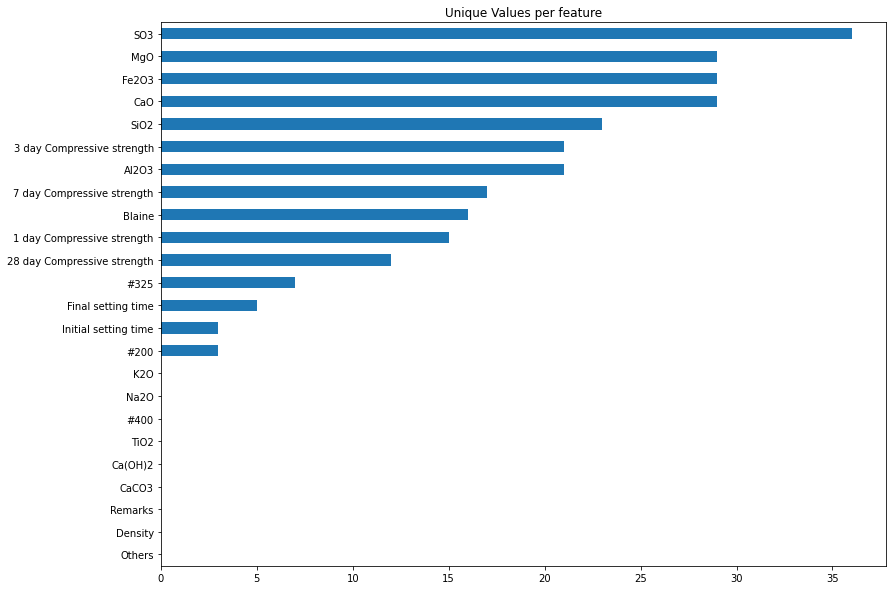

In [21]:
unique_values = df.select_dtypes(include='number').nunique().sort_values()

unique_values.plot.barh(logy=False, figsize=(13, 10), title='Unique Values per feature')

(array([0]), [Text(0, 0, 'Date')])

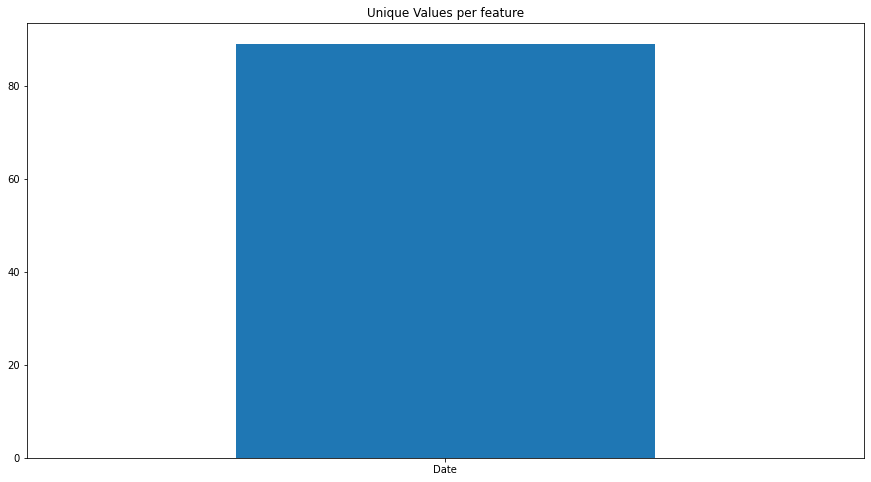

In [22]:
unique_values = df.select_dtypes(exclude='number').nunique().sort_values()

unique_values.plot.bar(logy=False, figsize=(15, 8), title='Unique Values per feature')

plt.xticks(rotation=0)

<h3>2.2. Missing values</h3>

In [23]:
print("There are", df.isna().any().sum(), "variables with missing values from a total of", df.shape[1])

There are 24 variables with missing values from a total of 25


In [24]:
df.isna().any()

Date                           False
CaO                             True
MgO                             True
Na2O                            True
Al2O3                           True
SiO2                            True
SO3                             True
K2O                             True
TiO2                            True
Fe2O3                           True
Ca(OH)2                         True
CaCO3                           True
Others                          True
Remarks                         True
Blaine                          True
Initial setting time            True
Final setting time              True
Density                         True
1 day Compressive strength      True
3 day Compressive strength      True
7 day Compressive strength      True
28 day Compressive strength     True
#200                            True
#325                            True
#400                            True
dtype: bool

In [25]:
df.isna().sum()

Date                            0
CaO                            40
MgO                            40
Na2O                           89
Al2O3                          40
SiO2                           40
SO3                            40
K2O                            89
TiO2                           89
Fe2O3                          40
Ca(OH)2                        89
CaCO3                          89
Others                         89
Remarks                        89
Blaine                         39
Initial setting time           39
Final setting time             39
Density                        89
1 day Compressive strength     39
3 day Compressive strength     39
7 day Compressive strength     39
28 day Compressive strength    39
#200                           40
#325                           40
#400                           89
dtype: int64

In [26]:
print("There are a total of ", df.isna().sum().sum(), "missing values.")

There are a total of  1394 missing values.


/home/felipe/Documents/ccs28-venv/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Count of quantity of missing values')

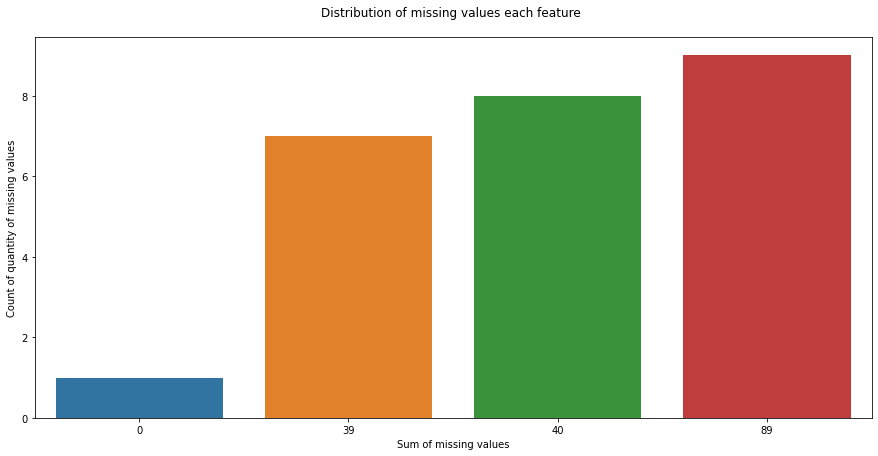

In [27]:
plt.figure(figsize=(15, 7))
sns.countplot(df.isna().sum())
plt.title("Distribution of missing values each feature \n")
plt.xlabel("Sum of missing values")
plt.ylabel("Count of quantity of missing values")

<BarContainer object of 25 artists>

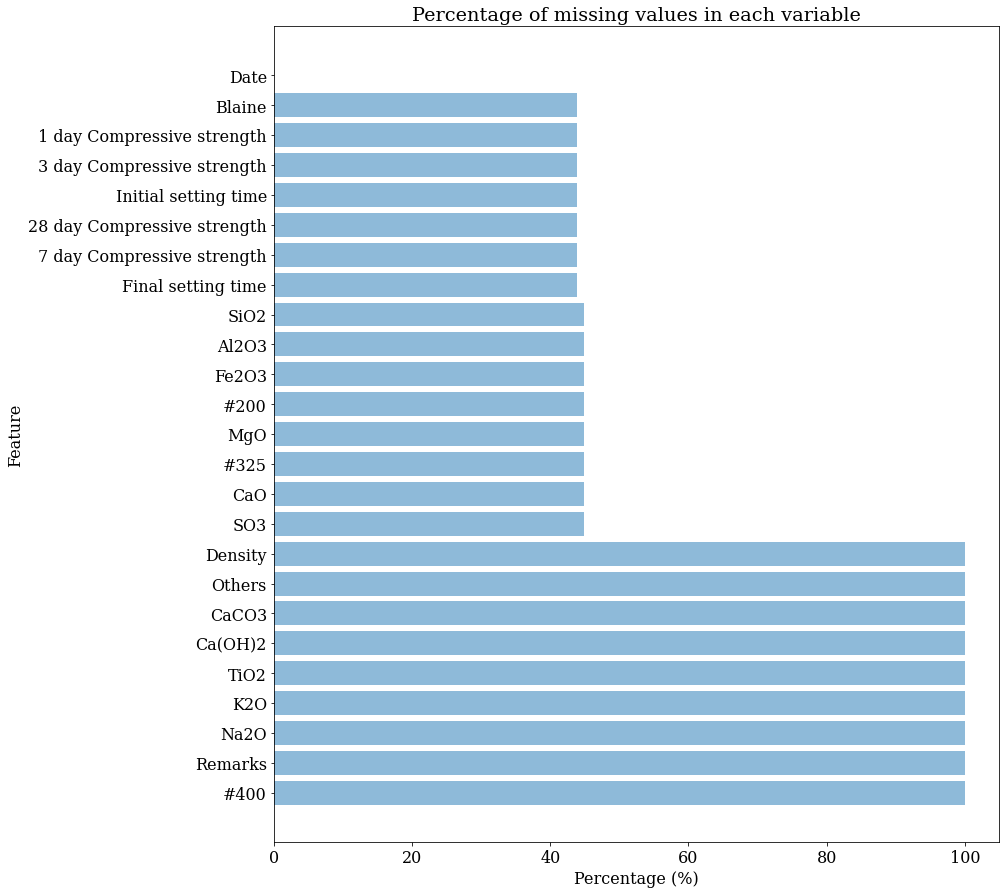

In [28]:
miss_perc = df.isnull().sum() / df.shape[0] * 100
miss_perc = miss_perc.sort_values(ascending=False)
plt.rc("font", family="serif", size=16)
plt.figure(figsize=(13, 15))
plt.title("Percentage of missing values in each variable")
plt.xlabel("Percentage (%)")
plt.ylabel("Feature")
plt.barh(miss_perc.index, miss_perc.round(2), alpha=0.5)

In [29]:
miss_perc

#400                           100.000000
Remarks                        100.000000
Na2O                           100.000000
K2O                            100.000000
TiO2                           100.000000
Ca(OH)2                        100.000000
CaCO3                          100.000000
Others                         100.000000
Density                        100.000000
SO3                             44.943820
CaO                             44.943820
#325                            44.943820
MgO                             44.943820
#200                            44.943820
Fe2O3                           44.943820
Al2O3                           44.943820
SiO2                            44.943820
Final setting time              43.820225
7 day Compressive strength      43.820225
28 day Compressive strength     43.820225
Initial setting time            43.820225
3 day Compressive strength      43.820225
1 day Compressive strength      43.820225
Blaine                          43

<BarContainer object of 25 artists>

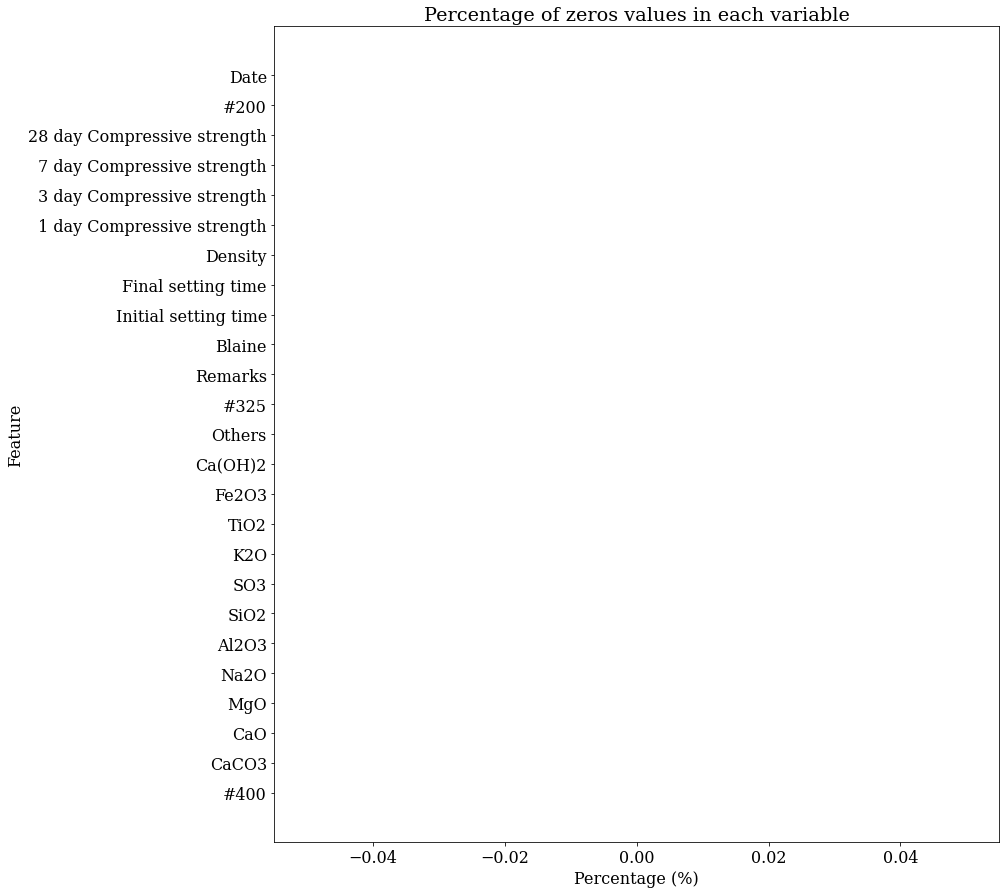

In [30]:
zeros_perc = (df == 0).sum(axis=0) / df.shape[0] * 100
zeros_perc = zeros_perc.sort_values(ascending=False)
plt.rc("font", family="serif", size=16)
plt.figure(figsize=(13, 15))
plt.title("Percentage of zeros values in each variable")
plt.xlabel("Percentage (%)")
plt.ylabel("Feature")
plt.barh(zeros_perc.index, zeros_perc.round(2), alpha=0.5)

<h3>2.4. Duplicates</h3>

In [31]:
n_duplicates = df.duplicated().sum()
print(f"There are {n_duplicates} duplicates samples.")

There are 0 duplicates samples.


In [32]:
n_duplicates = (
    df.drop(["Date"], axis=1)
    .duplicated()
    .sum()
)
print(f"There are {n_duplicates} duplicates samples.")

There are 27 duplicates samples.


<h2>3. Content Investigation</h2>

<h3>3.1. Feature distribution</h3>

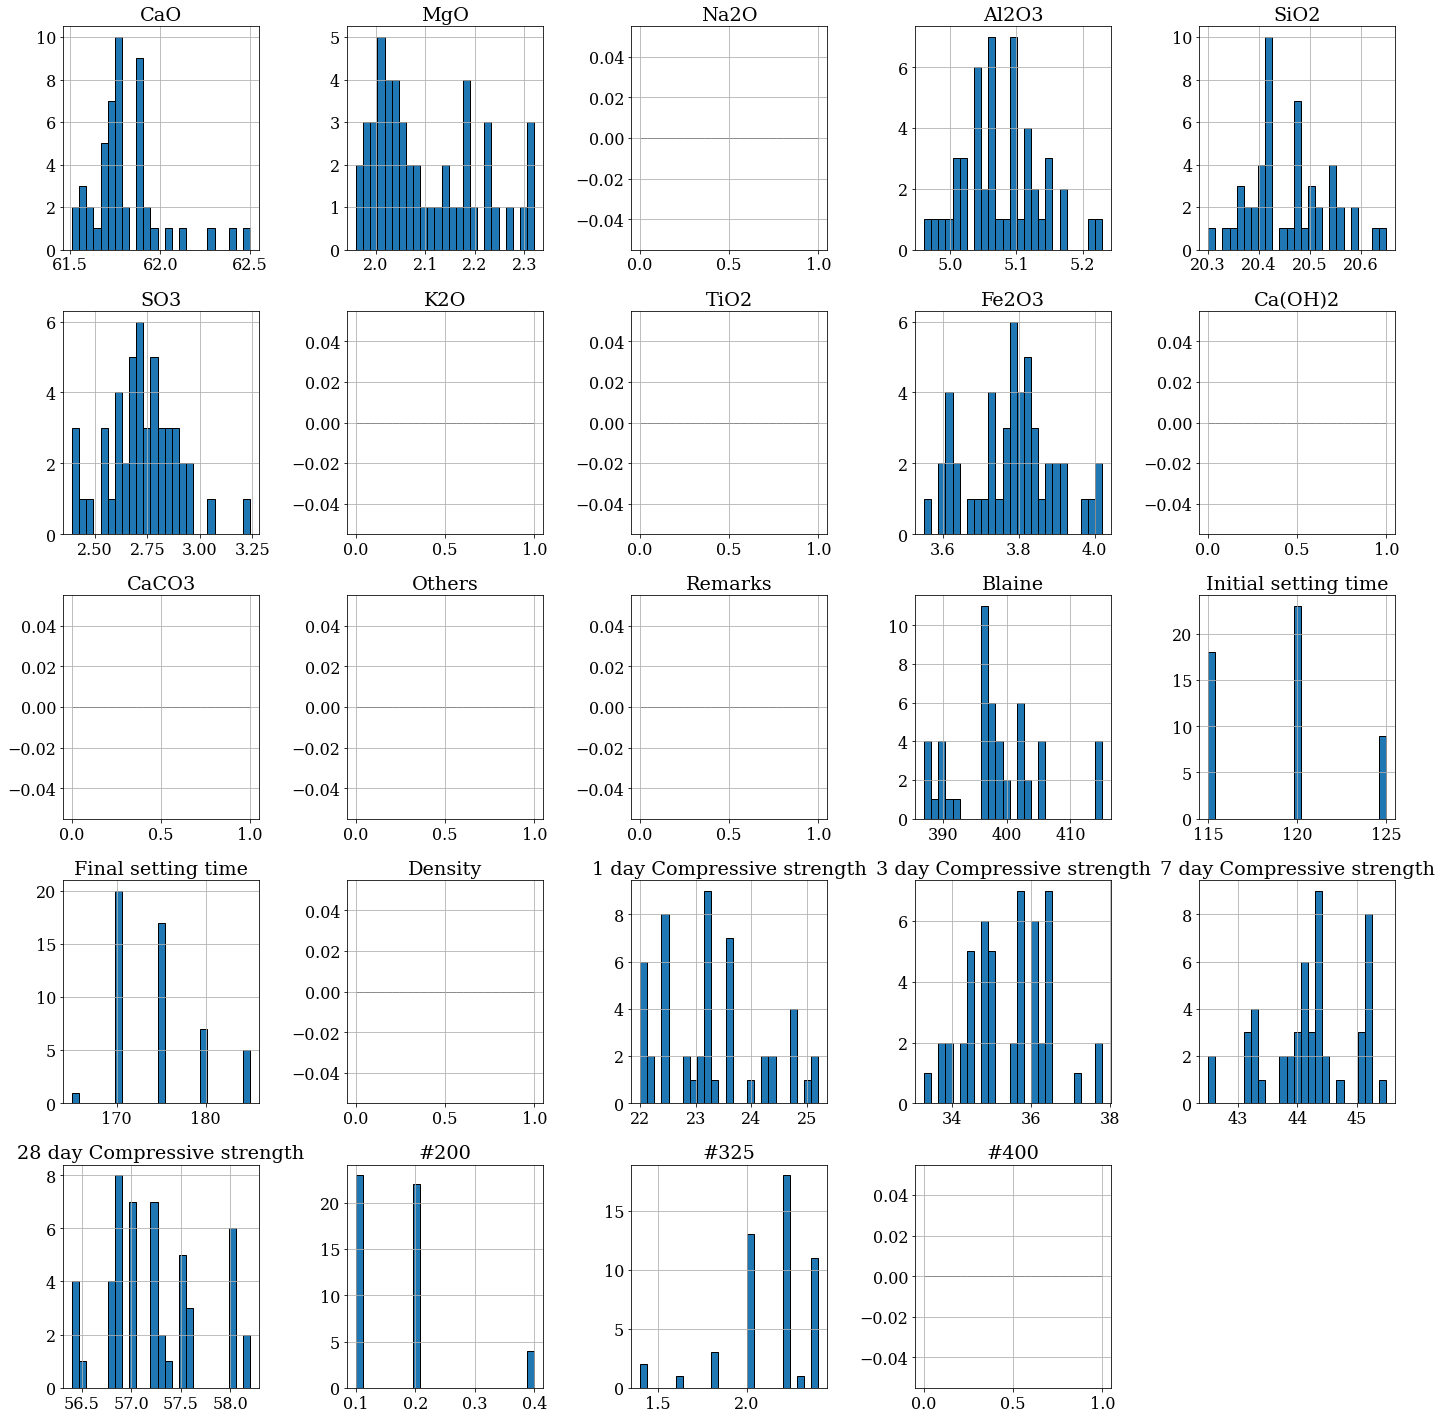

In [33]:
df.hist(bins=25, figsize=(20, 20), layout=(-1, 5), edgecolor="black")
plt.tight_layout()

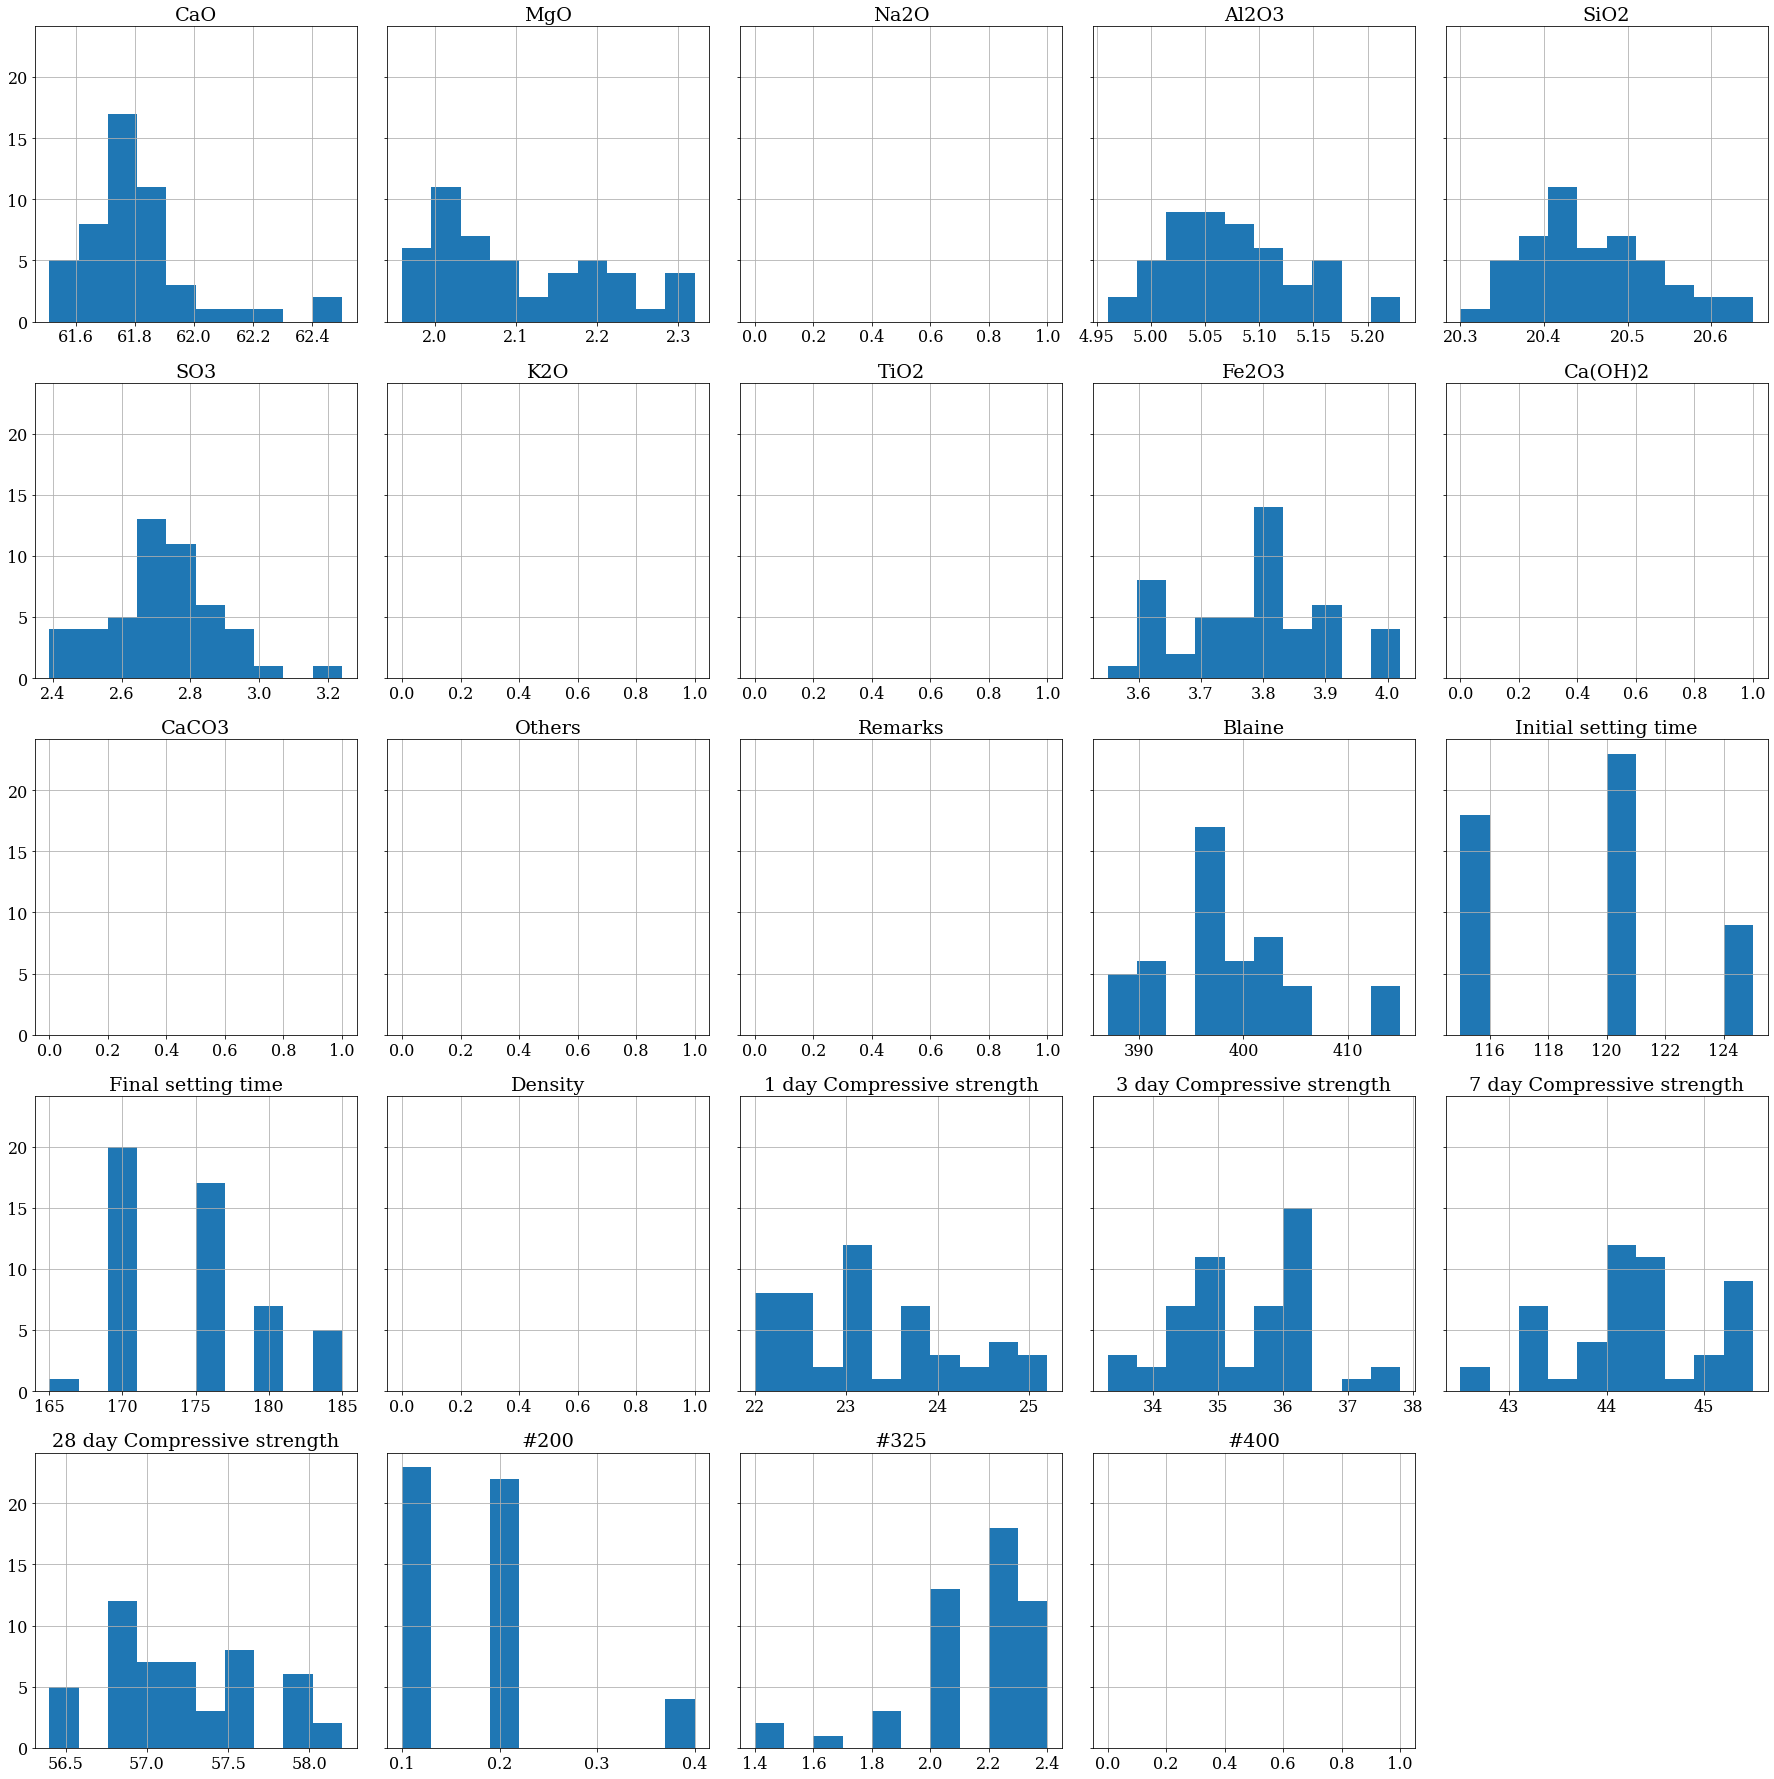

In [34]:
df.select_dtypes(include='float64').hist(figsize=(25, 25), sharey=True);
plt.tight_layout()

<h3>Data distribution - KDE plot</h3>

Kdeplot is a Kernel Distribution Estimation Plot which depicts the probability density function of the continuous or non-parametric data variables

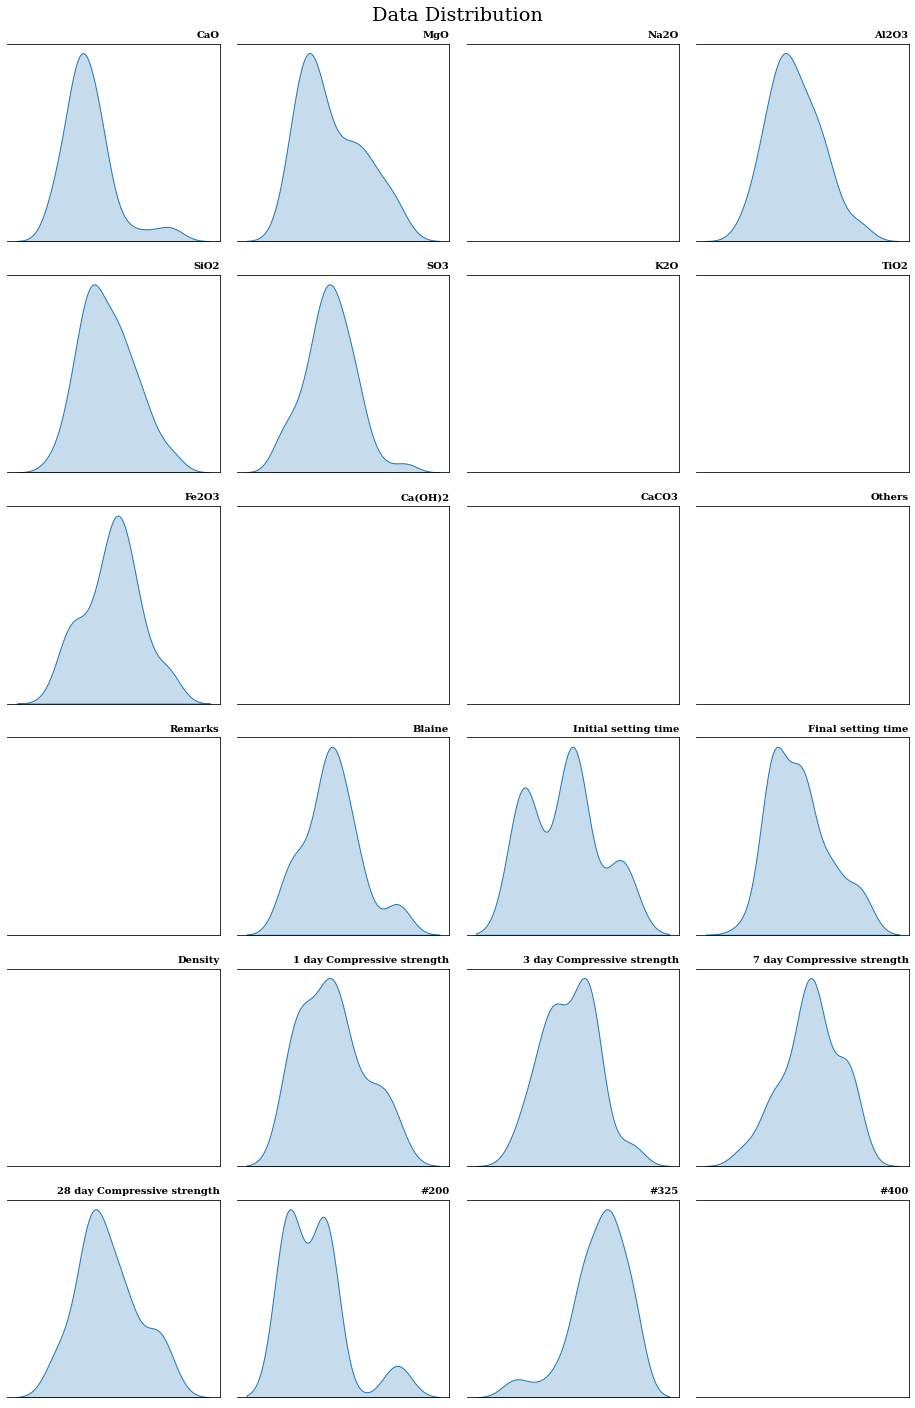

In [35]:
fig, axes = plt.subplots(6, 4, figsize=(13, 20))
axes = axes.flatten()
sns.set_palette(sns.color_palette(["#2a9d8f", "#e9c46a"]))
columns = df.select_dtypes(include="float64").columns

for i, ax in enumerate(axes):
    sns.kdeplot(data=df[columns], x=columns[i], ax=ax, palette=["#2a9d8f"], shade=True)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.spines["left"].set_visible(False)
    ax.set_title(columns[i], loc="right", weight="bold", fontsize=10)

# fig.supxlabel('Average (float features)', ha='center', fontweight='bold')
fig.suptitle("Data Distribution")

fig.tight_layout()
plt.show()

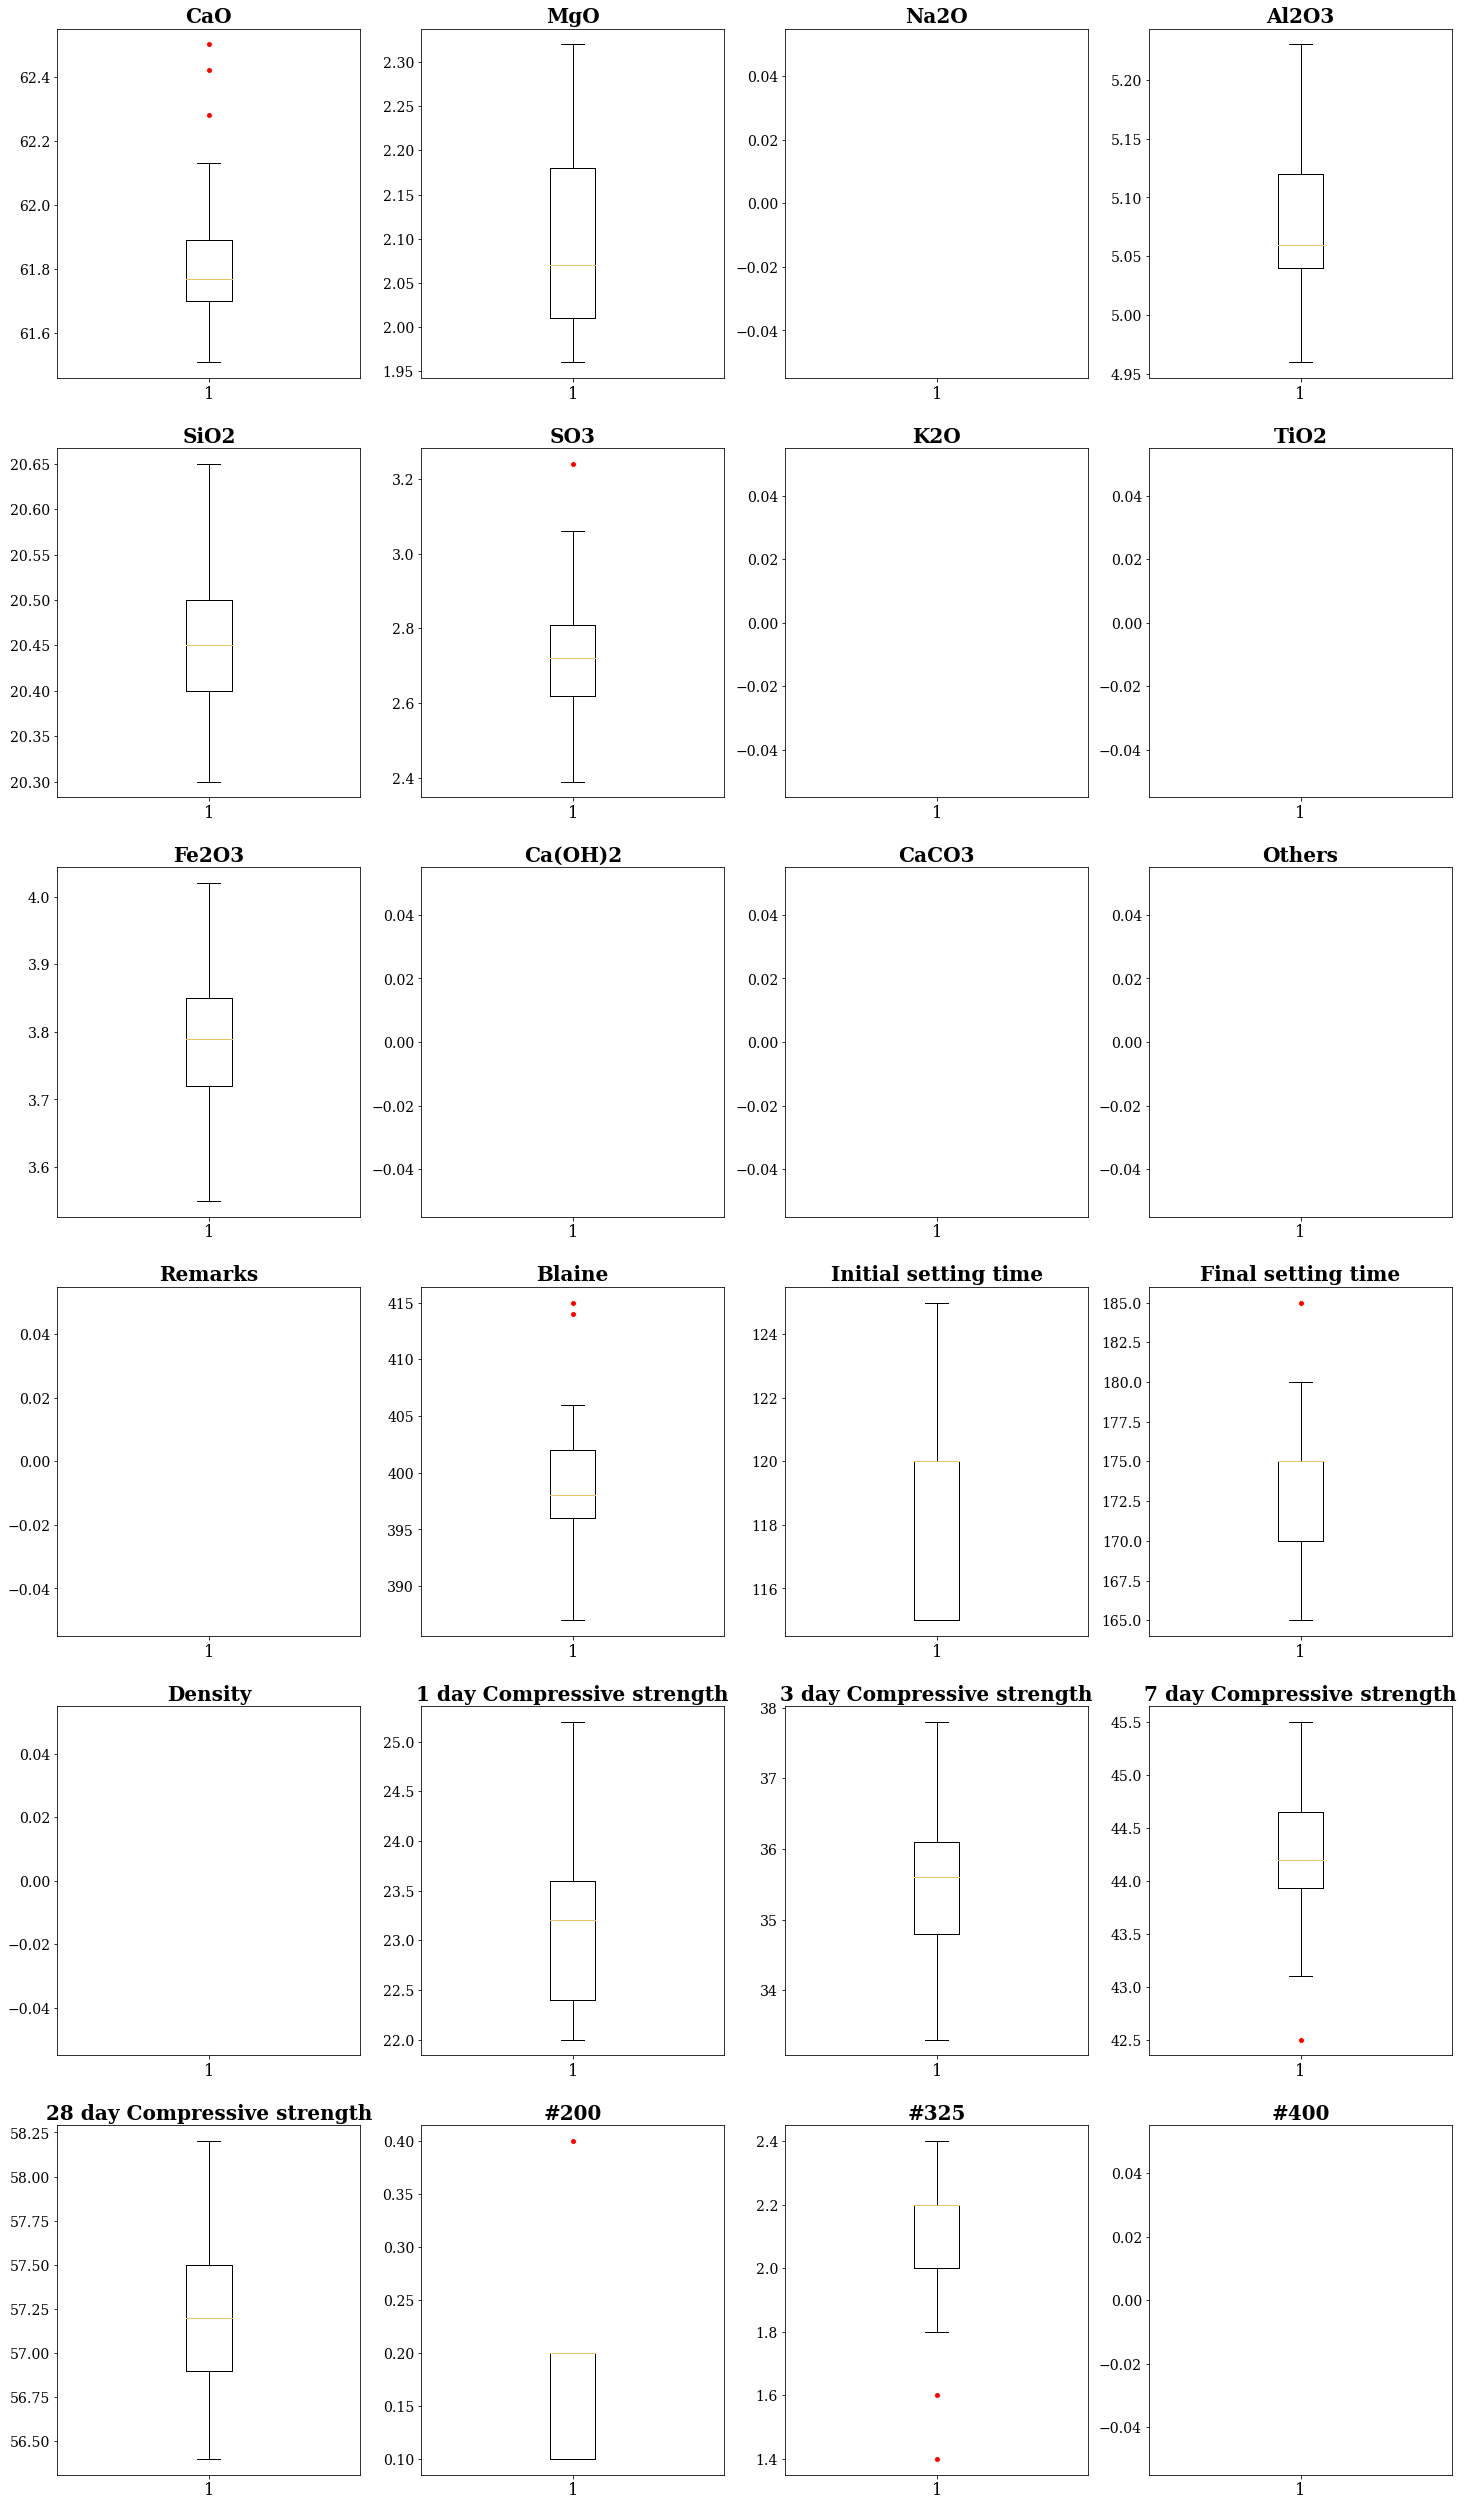

In [36]:
#Creating subplot of each column with its own scale
float64_columns = df.select_dtypes(include='float64').columns
df_float64_columns = df[float64_columns]

red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')
fig, axs = plt.subplots(6, 4, figsize=(25,45))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df_float64_columns.iloc[:,i].dropna(), flierprops=red_circle)
    ax.set_title(df_float64_columns.columns[i], fontsize=20, fontweight='bold')
    ax.tick_params(axis='y', labelsize=14)

<h3>3.3. Feature Relationship</h3>

<AxesSubplot:>

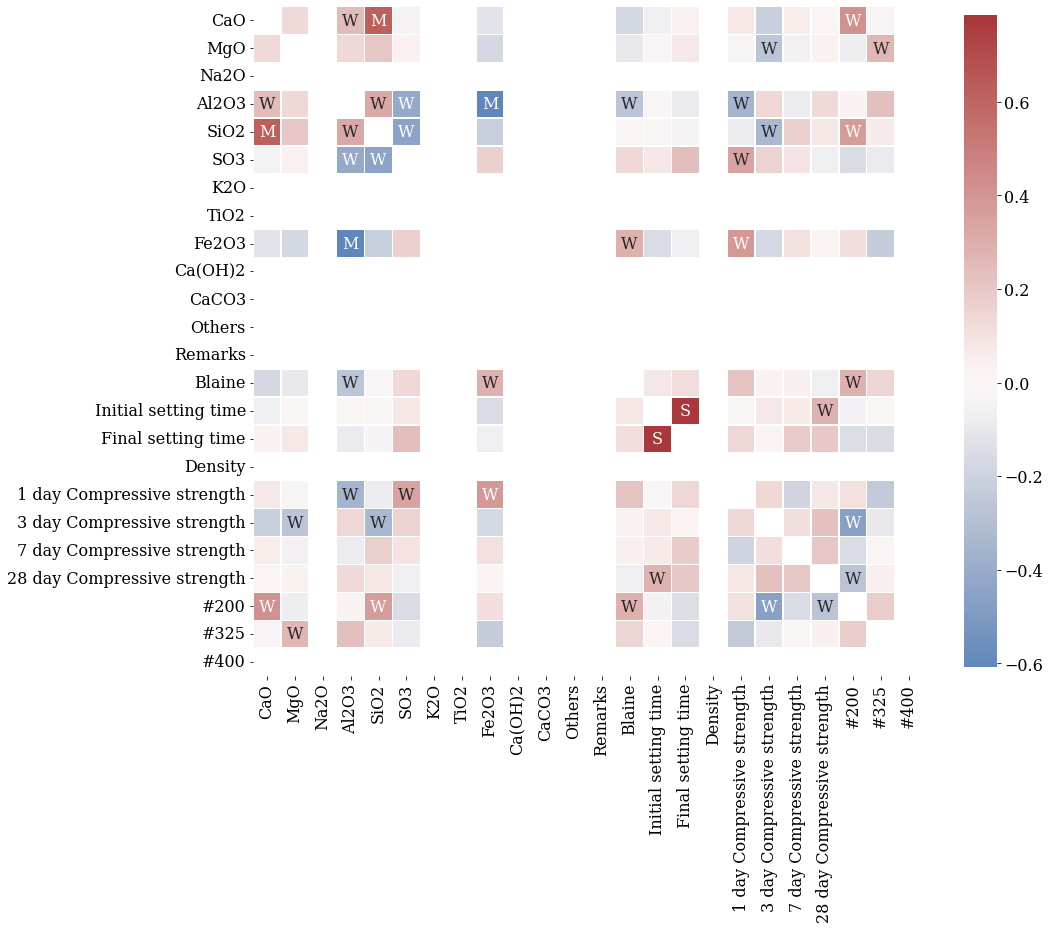

In [37]:
df_corr = df.corr(method="pearson")

# Create labels for the correlation matrix
labels = np.where(
    np.abs(df_corr) > 0.75,
    "S",
    np.where(np.abs(df_corr) > 0.5, "M", np.where(np.abs(df_corr) > 0.25, "W", "")),
)

# Plot correlation matrix
plt.figure(figsize=(15, 15))

sns.heatmap(
    df_corr,
    mask=np.eye(len(df_corr)),
    square=True,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
)

<AxesSubplot:>

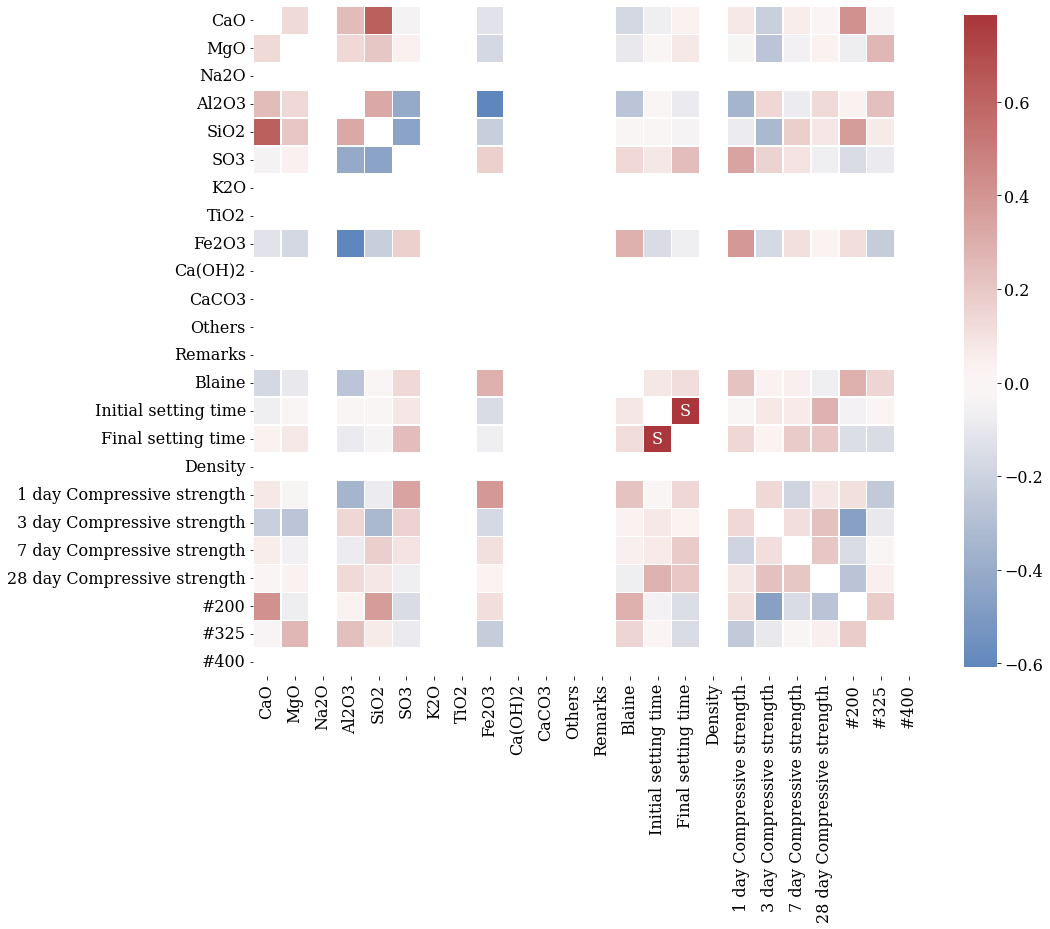

In [38]:
df_corr = df.corr(method="pearson")

# Create labels for the correlation matrix
labels = np.where(np.abs(df_corr) > 0.75, "S", "")


# Plot correlation matrix
plt.figure(figsize=(15, 15))

sns.heatmap(
    df_corr,
    mask=np.eye(len(df_corr)),
    square=True,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
)

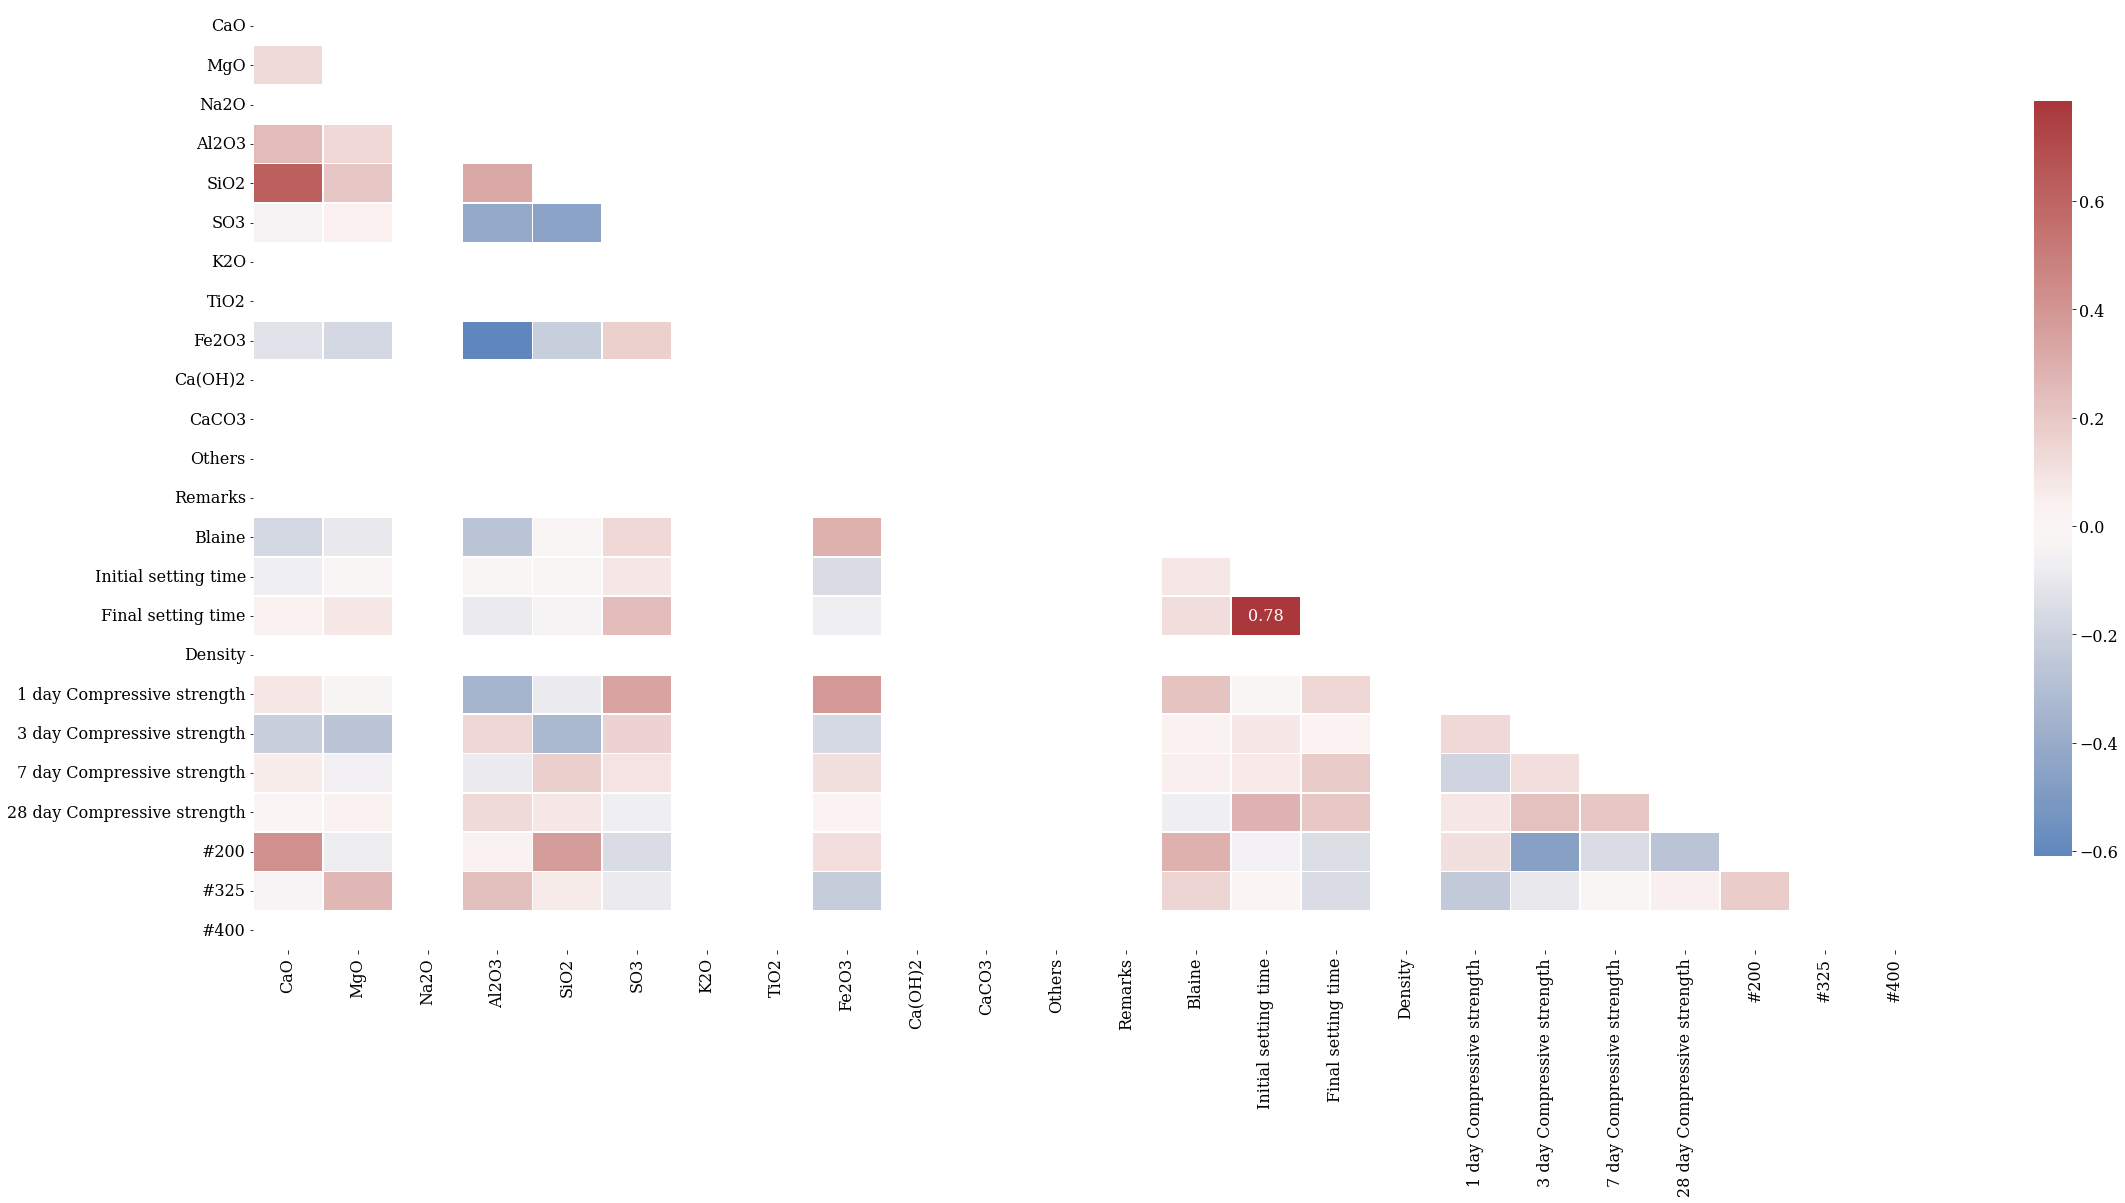

In [39]:
df_corr = df.corr(method="pearson")

labels = np.where(
    np.abs(df_corr) > 0.75, np.round(df_corr[np.abs(df_corr) > 0.75], 2), ""
)

# plt.figure(figsize=(17, 13))
fig, ax = plt.subplots(figsize=(33, 17))

sns.heatmap(
    df_corr,
    mask=np.triu(np.ones_like(df_corr, dtype=bool)),
    square=False,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
    ax=ax,
)

plt.tight_layout()

In [40]:
corr_matrix = df.corr(method="pearson").abs()

sol = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
    .stack()
    .sort_values(ascending=False)
)

sol[sol > 0.75]

Initial setting time  Final setting time    0.784901
dtype: float64

In [41]:
def corrfunc(x, y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    ax.annotate(f"ρ = {r:.2f}", xy=(0.1, 0.9), xycoords=ax.transAxes)
    return None

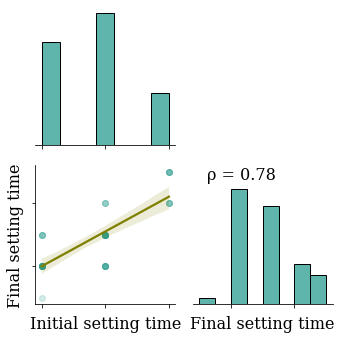

In [42]:
for pair in sol[sol > 0.75].index.values:
    if pair[0] != pair[1]:
        data = df[[pair[0], pair[1]]].dropna()
        g = sns.pairplot(
            data,
            corner=True,
            kind="reg",
            plot_kws={"line_kws": {"color": "olive"}, "scatter_kws": {"alpha": 0.2}},
        )
        corrfunc(data[pair[0]], data[pair[1]])
        g.set(xticklabels=[])
        g.set(yticklabels=[])

plt.tight_layout()

### 4. Date Variable Analyses

In [43]:
dates = pd.to_datetime(df["Date"])

In [44]:
# All years of data
years = set(map(lambda date: date.year, dates))
print("Years present in the data:", years)

Years present in the data: {2022}


In [45]:
months_each_year = {}
for year in years:
    months_each_year[year] = set([date.month for date in dates if date.year == year])

print("Months of data for each year:")
months_each_year

Months of data for each year:


{2022: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}}

In [46]:
# Here we get the frequency of the whole time series

diffs = []

for i in range(1, len(dates)):
    diffs.append(dates[i] - dates[i-1])
diffs

[Timedelta('31 days 00:00:00'),
 Timedelta('28 days 00:00:00'),
 Timedelta('31 days 00:00:00'),
 Timedelta('30 days 00:00:00'),
 Timedelta('31 days 00:00:00'),
 Timedelta('30 days 00:00:00'),
 Timedelta('31 days 00:00:00'),
 Timedelta('31 days 00:00:00'),
 Timedelta('30 days 00:00:00'),
 Timedelta('31 days 00:00:00'),
 Timedelta('30 days 00:00:00'),
 Timedelta('-292 days +00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('-56 days +00:00:00'),
 Timedelta('31 days 00:00:00'),
 Timedelta('28 days 00:00:00'),
 Timedelta('31 days 00:00:00'),
 Timedelta('30 day

In [47]:
Counter(diffs)

Counter({Timedelta('31 days 00:00:00'): 18,
         Timedelta('28 days 00:00:00'): 3,
         Timedelta('30 days 00:00:00'): 12,
         Timedelta('-292 days +00:00:00'): 1,
         Timedelta('1 days 00:00:00'): 50,
         Timedelta('-56 days +00:00:00'): 1,
         Timedelta('-265 days +00:00:00'): 1,
         Timedelta('-86 days +00:00:00'): 1,
         Timedelta('-235 days +00:00:00'): 1})

<AxesSubplot:xlabel='count'>

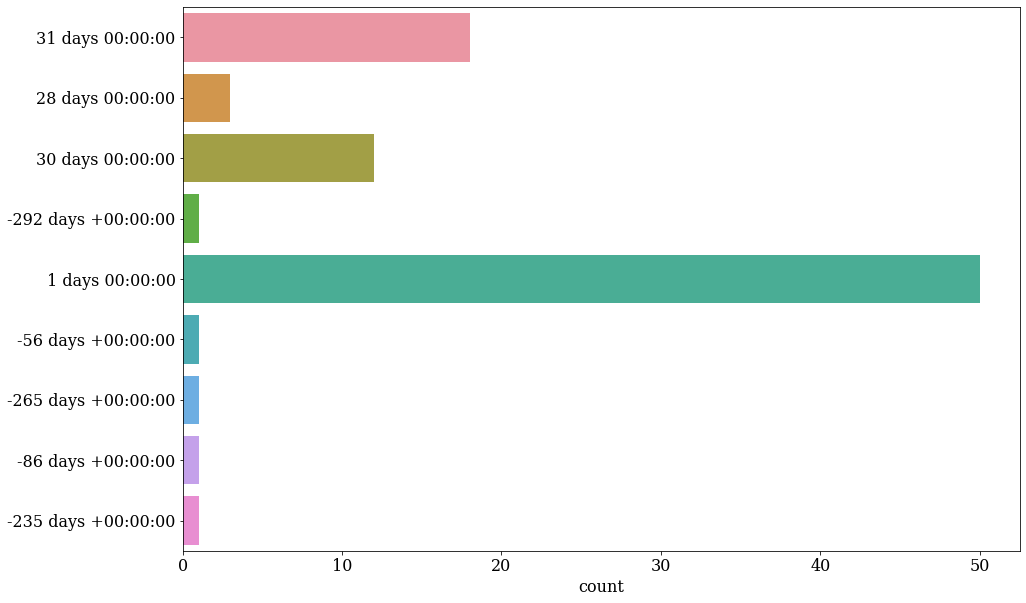

In [48]:
# sns.set_theme(style="darkgrid")
plt.figure(figsize=(15, 10))
sns.countplot(y=diffs)